# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

### 目录:
[1 矩阵运算](#1-矩阵运算)  
[2 Gaussian Jordan 消元法](#2-Gaussian-Jordan-消元法)  
[3  线性回归](#3-线性回归)  

In [54]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 5

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [55]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0], 
     [0,1,0,0], 
     [0,0,1,0],
     [0,0,0,1]]


## 1.2 返回矩阵的行数和列数

In [56]:
# TODO 返回矩阵的行数和列数
def shape(M):
    rows = len(M)
    if rows != 0:
        cols = len(M[0])
    else:
        cols = 0
    return rows,cols

In [57]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [58]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    for row in range(len(M)):
        for col in range(len(M[row])):
            M[row][col] = round(M[row][col], decPts)
    pass

In [59]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


## 1.4 计算矩阵的转置

In [60]:
# TODO 计算矩阵的转置
def transpose(M):
    return [list(col) for col in zip(*M)]

In [61]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


## 1.5 计算矩阵乘法 AB

In [62]:
def matxInnerMultipy(col,row):
    sum = 0
    for i in range(len(col)):
        sum += col[i] * row[i]
    return sum

# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    """
    若 A 为 n 行 m 列
    则 B 必须 m 行 p 列
    返回 M 为 n 行 p 列，每一元素为 A 的第 n 行行向量点乘 B 的第 p 列列向量
    """
    n = len(A)
    m = len(A[0])
    if len(B) != m:
        raise ValueError
        
    p = len(B[0])
    
    M = [[0 for col in range(p)] for row in range(n)]
    
    for row_n in range(len(M)):
        for col_p in range(len(M[row_n])):
            M[row_n][col_p] = matxInnerMultipy(A[row_n], transpose(B)[col_p])
    
    return M

In [63]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.132s

OK


---

# 2 Gaussian Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [64]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    """
    若 A 为 n 行 m 列
    则 B 必须 n 行 1 列
    返回 Ab 为 n 行 m+1 列
    """
    return [ra + rb for ra, rb in zip(A, b)]

In [65]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [66]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    M[r1], M[r2] = M[r2], M[r1]
    pass

In [67]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [68]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError
    M[r] = [row * scale for row in M[r]]
    pass

In [69]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [70]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    M[r1] = [row1 + row2 * scale for row1, row2 in zip(M[r1], M[r2])]
    pass

In [71]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

#### 推演示例 


$Ab = \begin{bmatrix}
    -7 & 5 & -1 & 1\\
    1 & -3 & -8 & 1\\
    -10 & -2 & 9 & 1\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & \frac{1}{5} & -\frac{9}{10} & -\frac{1}{10}\\
    0 & -\frac{16}{5} & -\frac{71}{10} & \frac{11}{10}\\
    0 & \frac{32}{5} & -\frac{73}{10} & \frac{3}{10}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & -\frac{43}{64} & -\frac{7}{64}\\
    0 & 1 & -\frac{73}{64} & \frac{3}{64}\\
    0 & 0 & -\frac{43}{4} & \frac{5}{4}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & 0 & -\frac{3}{16}\\
    0 & 1 & 0 & -\frac{59}{688}\\
    0 & 0 & 1 & -\frac{5}{43}\end{bmatrix}$
    

#### 推演有以下要求:
1. 展示每一列的消元结果, 比如3*3的矩阵, 需要写三步
2. 用分数来表示
3. 分数不能再约分
4. 我们已经给出了latex的语法,你只要把零改成你要的数字(或分数)即可
5. 可以用[这个页面](http://www.math.odu.edu/~bogacki/cgi-bin/lat.cgi?c=sys)检查你的答案(注意只是答案, 推演步骤两者算法不一致)

_你可以用python的 [fractions](https://docs.python.org/2/library/fractions.html) 模块辅助你的约分_

#### 分数的输入方法
(双击这个区域就能看到语法啦)  
  
示例一: $\frac{n}{m}$  

示例二: $-\frac{a}{b}$  

#### 以下开始你的尝试吧!

In [72]:
# 不要修改这里！
from helper import *
A = generateMatrix(3,seed,singular=False)
b = np.ones(shape=(3,1),dtype=int) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

 -7,  4,  5 ||  1 
 -4,  6, -1 ||  1 
 -2, -6, -3 ||  1 


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵(注意使用[分数语法](#分数的输入方法))

$ Ab = \begin{bmatrix}
    1 & \frac{-4}{7} & \frac{-5}{7} & \frac{-1}{7} \\
    0 & \frac{26}{7} & \frac{-27}{7} & \frac{3}{7} \\
    0 & \frac{-50}{7} & \frac{-31}{7} & \frac{5}{7} \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & \frac{-9}{25} & \frac{-1}{5} \\
    0 & 1 & \frac{31}{50} & \frac{-1}{10} \\
    0 & 0 & \frac{-154}{25} & \frac{4}{5} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{-19}{77} \\
    0 & 1 & 0 & \frac{-3}{154} \\
    0 & 0 & 1 & \frac{-10}{77} \end{bmatrix}$
    
$...$

In [73]:
# 不要修改这里！
A = generateMatrix(3,seed,singular=True)
b = np.ones(shape=(3,1),dtype=int)
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

  7, -1,  7 ||  1 
  3,  5, -1 ||  1 
  0,  0,  0 ||  1 


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵(注意使用[分数语法](#分数的输入方法))

$ Ab = \begin{bmatrix}
    1 & \frac{-1}{7} & 1 & \frac{1}{7} \\
    0 & 8 & -22 & -2 \\
    0 & 0 & 0 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & \frac{17}{28} & \frac{3}{28} \\
    0 & 1 & \frac{-11}{4} & \frac{-1}{4} \\
    0 & 0 & 0 & 1 \end{bmatrix}$
    
$ --> \begin{bmatrix}
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \end{bmatrix}$
    
$...$

### 2.3.3 实现 Gaussian Jordan 消元法

In [250]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

class Matrix(object):

    def __init__(self, M):
        self.M = M

    def __str__(self):
        result = "Matrix:\n"
        for row in self.M:
            result += str(row) + "\n"
        result += "\n"
        return result

    def get_row_counts(self):
        return len(self.M)

    def get_col_counts(self):
        return len(self.M[0])

    # 每个元素四舍五入到特定小数数位
    def round(self, decPts):
        for row in range(len(self.M)):
            for col in range(len(self.M[row])):
                self.M[row][col] = round(self.M[row][col], decPts)
        return self

    # 计算矩阵的转置
    def gen_transpose(self):
        M_T = [list(col) for col in zip(*self.M)]
        return Matrix(M_T)

    def dot_product(self, col, row):
        sum = 0
        for i in range(len(col)):
            sum += col[i] * row[i]
        return sum

    # 计算矩阵乘法 AB，如果无法相乘则raise ValueError
    def gen_multiply(self, another):
        """
        若 A 为 n 行 m 列
        则 B 必须 m 行 p 列
        返回 M 为 n 行 p 列，每一元素为 A 的第 n 行行向量点乘 B 的第 p 列列向量
        """
        A = self.M
        B = another.M
        B_T = another.gen_transpose().M
        n = len(A)
        mA = len(A[0])
        mB = len(B)
        p = len(B[0])
        if mA != mB:
            print("n = {},mA = {},mB = {},p = {}".format(n,mA,mB,p))
            raise ValueError

        p = len(B[0])

        M = [[0 for col in range(p)] for row in range(n)]

        for row_n in range(len(M)):
            for col_p in range(len(M[row_n])):
                M[row_n][col_p] = self.dot_product(A[row_n], B_T[col_p])

        return Matrix(M)

    # 构造增广矩阵，假设A，b行数相同
    def gen_augment(self, b):
        """
        若 A 为 n 行 m 列，二维数组
        则 b 必须 n 行 1 列，二维数组
        返回 Ab 为 n 行 m+1 列
        """
        A = self.M
        Ab = [ra + rb for ra, rb in zip(A, b)]
        return Matrix(Ab)

    # r1 <---> r2
    # 直接修改参数矩阵，无返回值
    def swapRows(self, r1, r2):
        self.M[r1], self.M[r2] = self.M[r2], self.M[r1]
        pass

    # r1 <--- r1 * scale
    # scale为0是非法输入，要求 raise ValueError
    # 直接修改参数矩阵，无返回值
    def scaleRow(self, r, scale):
        if scale == 0:
            raise ValueError
        self.M[r] = [row * scale for row in self.M[r]]
        pass

    # r1 <--- r1 + r2*scale
    # 直接修改参数矩阵，无返回值
    def addScaledRow(self, r1, r2, scale):
        self.M[r1] = [row1 + row2 * scale for row1, row2 in zip(self.M[r1], self.M[r2])]
        pass

    def gaussian_phase_find_max(self, n):
        max_num = 0
        max_row_idx = n
        for row_idx in range(self.get_row_counts()):
            if row_idx < n:
                continue
            if abs(max_num) < abs(self.M[row_idx][n]):
                max_num = self.M[row_idx][n]
                max_row_idx = row_idx
        return max_num, max_row_idx

    def gaussian_phase_to_zero(self, n):
        for row_idx in range(self.get_row_counts()):
            if row_idx == n:
                continue
            self.addScaledRow(row_idx, n, -self.M[row_idx][n])
        pass

    def gaussian(self, dePts, epsilon):
        for col_idx in range(self.get_col_counts() - 1):
            max_num, row_max = self.gaussian_phase_find_max(col_idx)
            if abs(max_num) < epsilon:
                return None
            self.swapRows(col_idx, row_max)
            self.scaleRow(col_idx, 1/max_num)
            self.gaussian_phase_to_zero(col_idx)
        self.round(dePts)
        return self.get_x()

    def get_x(self):
        return [[row[-1]] for row in self.M]

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量 与 A 高度相同
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16

    返回列向量 x 使得 Ax = b 
    返回None，如果 A 为奇异矩阵
"""
def gj_Solve(A, b, decPts=4, epsilon=1.0e-16):
    Ab = Matrix(A).gen_augment(b)
    return Ab.gaussian(decPts, epsilon)


In [251]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 2.398s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：
因为方阵 A 的主元中包含 0，可得方阵 A 的行列式为 0。
所以方阵 A 是奇异矩阵。

# 3 线性回归

## 3.1 随机生成样本点

<IPython.core.display.Javascript object>


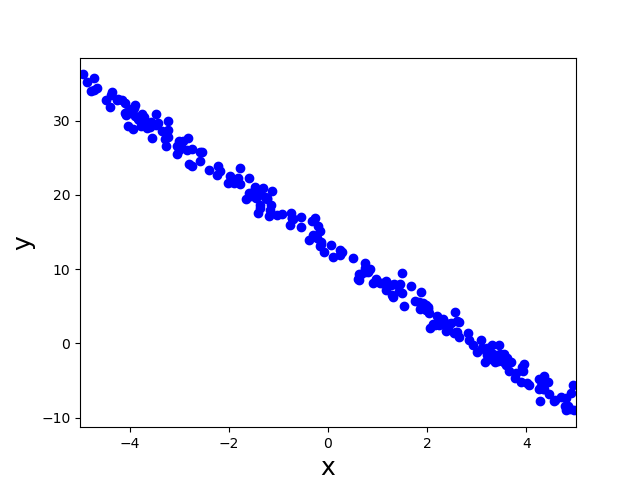

In [252]:
# 不要修改这里！
%matplotlib notebook
from helper import *

X,Y = generatePoints2D(seed)
vs_scatter_2d(X, Y)

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

<IPython.core.display.Javascript object>


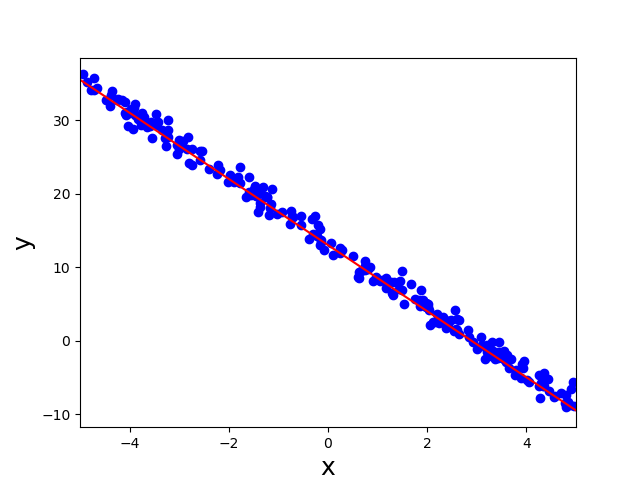

In [239]:
#TODO 请选择最适合的直线 y = mx + b
m1 = -4.5
b1 = 13.

# 不要修改这里！
vs_scatter_2d(X, Y, m1, b1)

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [253]:
# TODO 实现以下函数并输出所选直线的MSE
def calculateMSE2D(X,Y,m,b):
    total = 0
    for i in range(len(X)):
        x = X[i]
        y = Y[i]
        total += (y - m * x - b)**2
    return total / len(X)

# TODO 检查这里的结果, 如果你上面猜测的直线准确, 这里的输出会在1.5以内
print(calculateMSE2D(X,Y,m1,b1))

1.1327582886847354


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m1,b1$ 让蓝点均匀覆盖在红线周围，然后微调 $m1, b1$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:
$$
\frac{\partial E}{\partial m} = \frac{1}{2}\sum_{i=1}^{n}{(-2x_i(y_i - mx_i - b))}\\
= \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$
$$
\frac{\partial E}{\partial b} = \frac{1}{2}\sum_{i=1}^{n}{(-2(y_i - mx_i - b))}\\
= \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数
#### 目标函数
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$
#### 二元二次方程组
$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$
#### 求解最优参数 $m, b$
(1,1), (2,2), (3,2) 代入得：
$$
-11+14m+6b=0\\
-5+6m+3b=0
$$
求得：m=1/2,b=2/3

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:
$$
X^T=  \begin{bmatrix}
    x_1  & x_2 & ... & x_n \\
    1 & 1 & 1 & 1\\
\end{bmatrix},
$$

$$
X^TX=  \begin{bmatrix}
    \sum_{i=1}^{n}{x_i^2}  & \sum_{i=1}^{n}{x_i}\\
    \sum_{i=1}^{n}{x_i} & n\\
\end{bmatrix},
$$

$$
X^TXh=  \begin{bmatrix}
    \sum_{i=1}^{n}{x_i}(x_im+b)\\
    \sum_{i=1}^{n}{x_i}m + b\\
\end{bmatrix},
$$

$$
X^TY=  \begin{bmatrix}
    \sum_{i=1}^{n}{x_iy_i}\\
    \sum_{i=1}^{n}{y_i}\\
\end{bmatrix},
$$

$$
X^TXh - X^TY
= \begin{bmatrix}
    \sum_{i=1}^{n}{x_i}(x_im-y_i+b)\\
    \sum_{i=1}^{n}{x_i}m -y_i+ b\\
\end{bmatrix}\\
= \begin{bmatrix}
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}\\
\sum_{i=1}^{n}{-(y_i - mx_i - b)}\\
\end{bmatrix}\\
= \begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix}
$$

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [254]:
# TODO 实现线性回归
'''
参数：X, Y 存储着一一对应的横坐标与纵坐标的两个一维数组
返回：线性回归的系数(如上面所说的 m, b)
XTX->A
XTY->b
h->x
[
[m],
[b]
]
'''
def linearRegression2D(x,y):
    x = [[row, 1] for row in x]
    y = [[row] for row in y]
    X = Matrix(x)
    X_T = X.gen_transpose()
    Y = Matrix(y)
    A = X_T.gen_multiply(X)
    b = X_T.gen_multiply(Y)
    h = gj_Solve(A.M,b.M)
    return h[0][0],h[1][0]

In [255]:
# 请不要修改下面的代码
m2,b2 = linearRegression2D(X,Y)
assert isinstance(m2,float),"m is not a float"
assert isinstance(b2,float),"b is not a float"
print(m2,b2)

-4.4646 13.3938


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

<IPython.core.display.Javascript object>


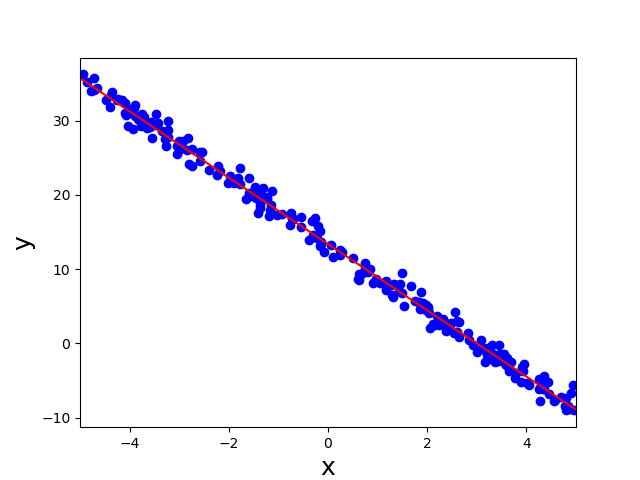

0.9609077467805289


In [256]:
## 请不要修改下面的代码
vs_scatter_2d(X, Y, m2, b2)
print(calculateMSE2D(X,Y,m2,b2))

## Bonus !!!
如果你的高斯约当消元法通过了单元测试, 那么它将能够解决多维的回归问题  
你将会在更高维度考验你的线性回归实现

<IPython.core.display.Javascript object>


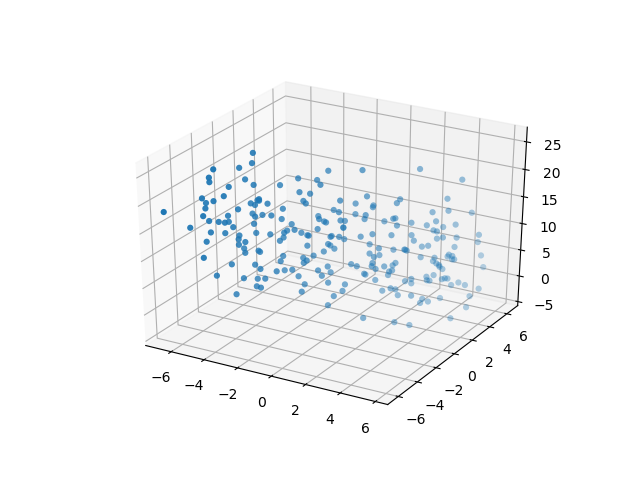

In [246]:
# 生成三维的数据点
X_3d, Y_3d = generatePoints3D(seed)
vs_scatter_3d(X_3d, Y_3d)

你的线性回归是否能够对付三维的情况?

In [257]:
def linearRegression(x,y):
    X = Matrix(x)
    X_T = X.gen_transpose()
    Y = Matrix(y)
    A = X_T.gen_multiply(X)
    b = X_T.gen_multiply(Y)
    h = gj_Solve(A.M,b.M)
    return h

[[-6.655693515165826, -6.1721530172932795, 1], [-4.686346477899896, -4.963086455989601, 1], [-4.375050498789263, -3.8049865946960497, 1], [-5.425279782694272, -4.174824828004889, 1], [-5.231555016623536, -4.545423068540554, 1], [-5.078635483098275, -5.01167086099095, 1], [-4.6685767831746094, -3.682040297690813, 1], [-2.9387296158526395, -4.749669528516313, 1], [-4.271152281453371, -4.278951555287802, 1], [-5.460960526403916, -4.4730603977380845, 1], [-4.565147810280174, -4.390152930057201, 1], [-3.6355415886159395, -4.040594731122185, 1], [-3.366498505349713, -2.442820896989942, 1], [-2.9827181945210626, -5.420520191027492, 1], [-5.4510078830882005, -3.7848869246157335, 1], [-3.6704751306721746, -2.5999795528030436, 1], [-4.978195444189237, -4.166426890727175, 1], [-4.753949619739115, -5.278662499343938, 1], [-5.447124841563812, -3.7596324765282074, 1], [-4.423625846685821, -6.10468627283954, 1], [-4.230527374278283, -4.34008697552571, 1], [-5.502504462462621, -5.58424040745707, 1], [

<IPython.core.display.Javascript object>


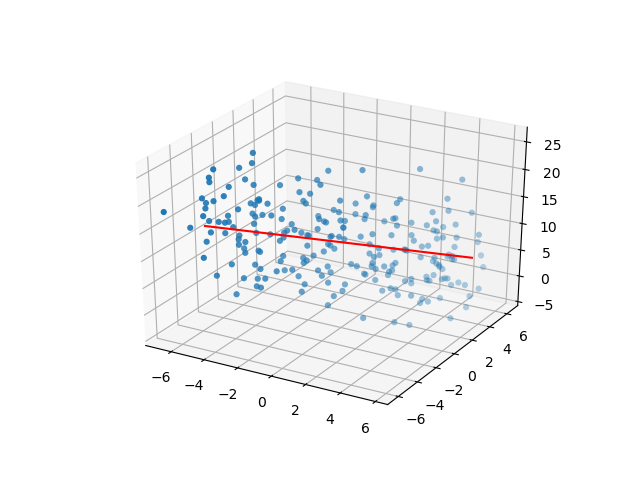

In [258]:
x_3d = [[*row, 1] for row in X_3d]
y_3d = [[row] for row in Y_3d]
print(x_3d)
coeff = linearRegression(x_3d, y_3d)
coeff_list = [0 for _ in range(len(coeff))]
for i in range(len(coeff)):
    coeff_list[i] = coeff[i][0]
vs_scatter_3d(X_3d, Y_3d, coeff_list)